<a href="https://colab.research.google.com/github/zaellis/270Computer/blob/master/openram_playground2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenRAM SKY130 playground

Generate OpenRAM macros with `open_pdks.sky130a`.

In [1]:
#@title Install dependencies {display-mode: "form"}
#@markdown - Click the ▷ button to setup the digital design environment based on [conda-eda](https://github.com/hdl/conda-eda).

openlane_version = 'latest' #@param {type:"string"}
open_pdks_version = 'latest' #@param {type:"string"}

if openlane_version == 'latest':
  openlane_version = ''
if open_pdks_version == 'latest':
  open_pdks_version = ''

import os
import pathlib
import sys

!curl -Ls https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xj bin/micromamba
conda_prefix_path = pathlib.Path('conda-env')
CONDA_PREFIX = str(conda_prefix_path.resolve())
!bin/micromamba create --yes --prefix $CONDA_PREFIX
!echo 'python ==3.7*' >> {CONDA_PREFIX}/conda-meta/pinned
!CI=0 bin/micromamba install --yes --prefix $CONDA_PREFIX \
                     --channel litex-hub \
                     --channel main \
                     openlane={openlane_version} \
                     open_pdks.sky130a={open_pdks_version}
!python -m pip install --no-binary gdstk gdstk cairosvg
PATH = os.environ['PATH']
%env CONDA_PREFIX={CONDA_PREFIX}
%env PATH={CONDA_PREFIX}/bin:{PATH}
site_package_path = conda_prefix_path / 'lib/python3.7/site-packages'
sys.path.append(str(site_package_path.resolve()))


                                           __
          __  ______ ___  ____ _____ ___  / /_  ____ _
         / / / / __ `__ \/ __ `/ __ `__ \/ __ \/ __ `/
        / /_/ / / / / / / /_/ / / / / / / /_/ / /_/ /
       / .___/_/ /_/ /_/\__,_/_/ /_/ /_/_.___/\__,_/
      /_/

Empty environment created at prefix: /content/conda-env

                                           __
          __  ______ ___  ____ _____ ___  / /_  ____ _
         / / / / __ `__ \/ __ `/ __ `__ \/ __ \/ __ `/
        / /_/ / / / / / / /_/ / / / / / / /_/ / /_/ /
       / .___/_/ /_/ /_/\__,_/_/ /_/ /_/_.___/\__,_/
      /_/


Pinned packages:
  - python 3.7*


Transaction

  Prefix: /content/conda-env

  Updating specs:

   - openlane=*
   - open_pdks.sky130a=*


  Package                              Version  Build                 Channel                 Size
────────────────────────────────────────────────────────────────────────────────────────────────────
  Install:
──────────────────────────────────────────

## Get OpenRAM

Get latest release and install requirements from PyPI.

In [2]:
%env PDK_ROOT=/content/conda-env/share/pdk
!git clone --depth=1 -b stable https://github.com/VLSIDA/OpenRAM.git
!python -m pip install -r OpenRAM/requirements.txt
!git clone --depth=1 https://github.com/vlsida/sky130_fd_bd_sram $PDK_ROOT/sky130_fd_bd_sram
!git clone --depth=1 https://github.com/google/skywater-pdk-libs-sky130_fd_sc_hd $PDK_ROOT/skywater-pdk/libraries/sky130_fd_sc_hd/latest
%env OPENRAM_HOME=/content/OpenRAM/compiler
%env OPENRAM_TECH=/content/OpenRAM/technology
%env PYTHONPATH=/content/OpenRAM/compiler:/content/OpenRAM/technology:/content/OpenRAM/technology/sky130/custom
!make -C OpenRAM $OPENRAM_HOME/../technology/sky130/gds_lib \
                 $OPENRAM_HOME/../technology/sky130/mag_lib \
                 $OPENRAM_HOME/../technology/sky130/sp_lib \
                 $OPENRAM_HOME/../technology/sky130/lvs_lib \
                 $OPENRAM_HOME/../technology/sky130/calibre_lvs_lib \
                 $OPENRAM_HOME/../technology/sky130/klayout_lvs_lib \
                 $OPENRAM_HOME/../technology/sky130/maglef_lib

env: PDK_ROOT=/content/conda-env/share/pdk
Cloning into 'OpenRAM'...
remote: Enumerating objects: 1026, done.
remote: Counting objects: 100% (1026/1026), done.
remote: Compressing objects: 100% (811/811), done.
remote: Total 1026 (delta 484), reused 433 (delta 206), pack-reused 0
Receiving objects: 100% (1026/1026), 5.27 MiB | 24.75 MiB/s, done.
Resolving deltas: 100% (484/484), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.3/224.3 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [25]:
%%writefile config.py
word_size = 32 # Bits
num_words = 32
human_byte_size = "{:.0f}kbytes".format((word_size * num_words)/1024/8)

# Allow byte writes
write_size = 32 # Bits

# Dual port
num_rw_ports = 0
num_r_ports = 1
num_w_ports = 1
ports = '1r1w'

tech_name = 'sky130'
nominal_corner_only = True

route_supplies = 'ring'
check_lvsdrc = True
uniquify = True

output_name = f'{tech_name}_sram_{ports}_{word_size}x{num_words}_{write_size}'
output_path = '.'

Overwriting config.py


In [26]:
!python3 $OPENRAM_HOME/../sram_compiler.py config.py

|==============================================================================|
|=========                       OpenRAM v1.2.8                       =========|
|=========                                                            =========|
|=========               VLSI Design and Automation Lab               =========|
|=========        Computer Science and Engineering Department         =========|
|=========            University of California Santa Cruz             =========|
|=========                                                            =========|
|=========          Usage help: openram-user-group@ucsc.edu           =========|
|=========        Development help: openram-dev-group@ucsc.edu        =========|
|=========                See LICENSE for license info                =========|
|==============================================================================|
** Start: 04/02/2023 00:48:51
Technology: sky130
Total size: 1024 bits
Word size: 32
Words: 32
Banks: 1
RW po

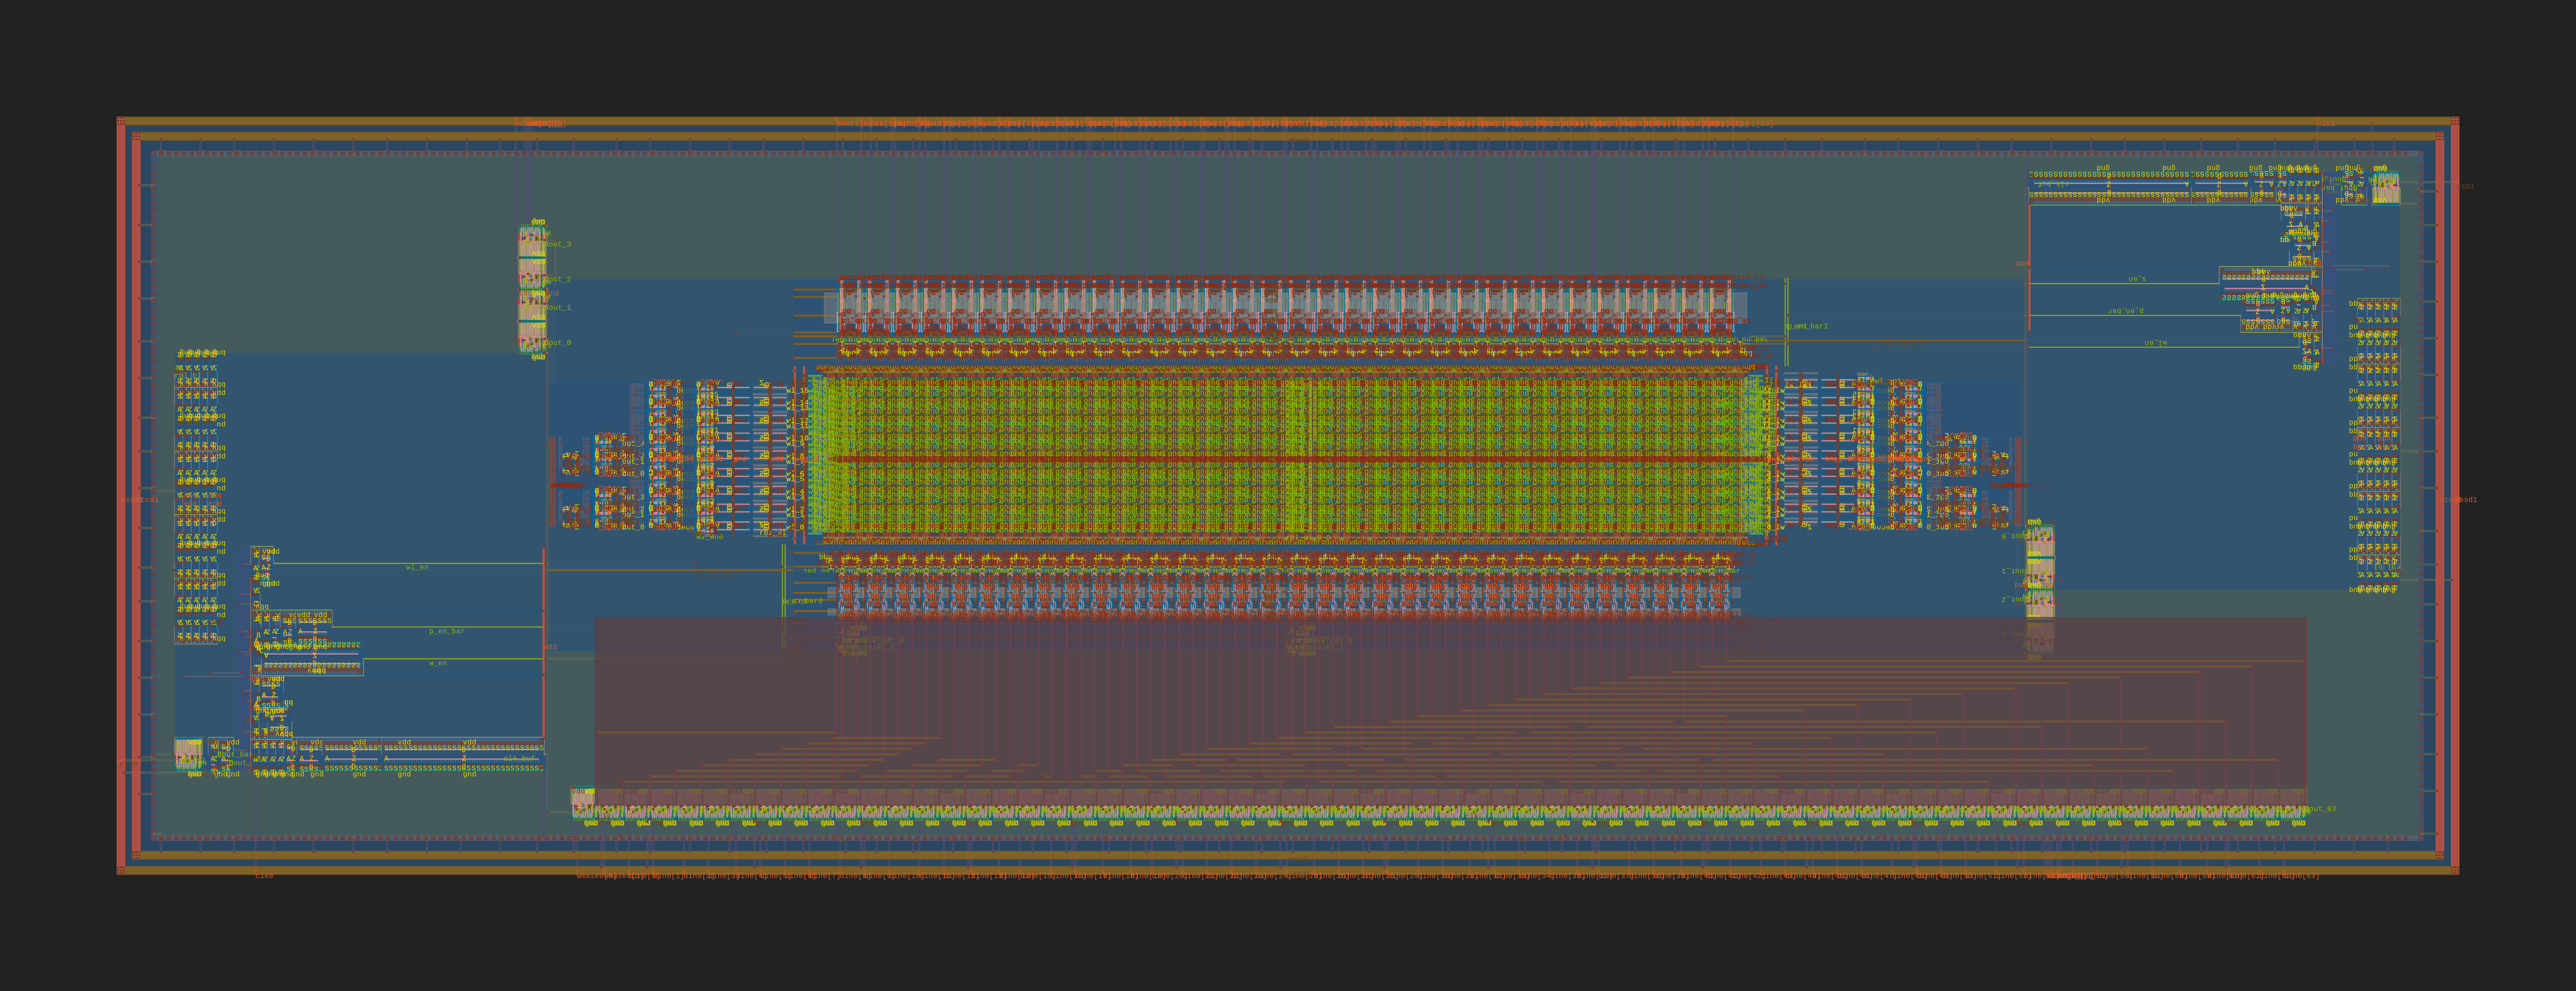

In [27]:
import gdstk
library = gdstk.read_gds('sky130_sram_1r1w_32x32_32.gds')
top_cells = library.top_level()
top_cells[0].write_svg('sky130_sram_1r1w_32x32_32.svg')
import cairosvg
cairosvg.svg2png(url='sky130_sram_1r1w_32x32_32.svg', write_to='sky130_sram_1r1w_32x32_32.png')
from IPython.display import Image
Image('sky130_sram_1r1w_64x16_32.png')